🚀 Initializing VolSense.Forecast (model=v6a)
✔ Window=40, Horizons=[1, 5, 10]

🌍 Running forecasts for 6 tickers...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Forecasting: 100%|██████████| 6/6 [00:00<00:00, 39.66it/s]


✅ Forecast complete.
  ticker  realized_vol  pred_vol_1  pred_vol_5  pred_vol_10  vol_diff  \
0   AAPL      0.263261    0.371559    0.345468     0.304790  0.108298   
1   MSFT      0.147084    0.280689    0.261830     0.229535  0.133605   
2   NVDA      0.329314    0.561839    0.510363     0.447948  0.232525   
3   TSLA      0.494639    0.637806    0.586821     0.520773  0.143166   
4   META      0.213953    0.479174    0.439553     0.391581  0.265221   
5    JPM      0.191760    0.361235    0.329886     0.282598  0.169475   

   vol_direction  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  
5            1.0  


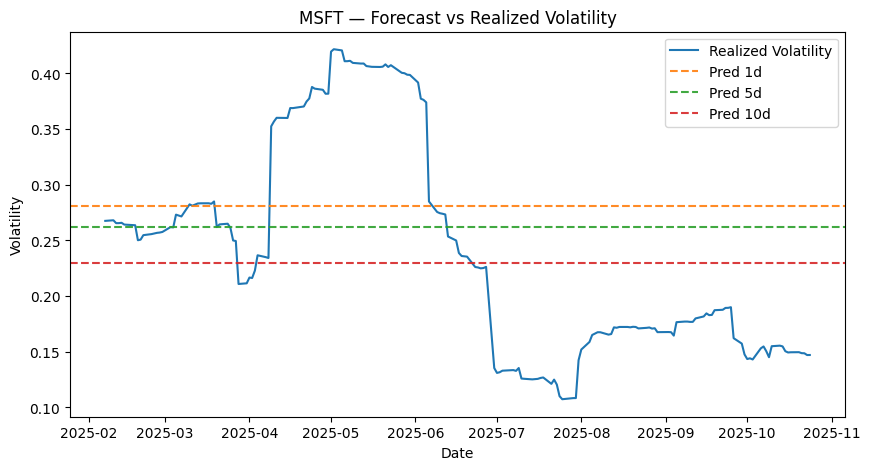

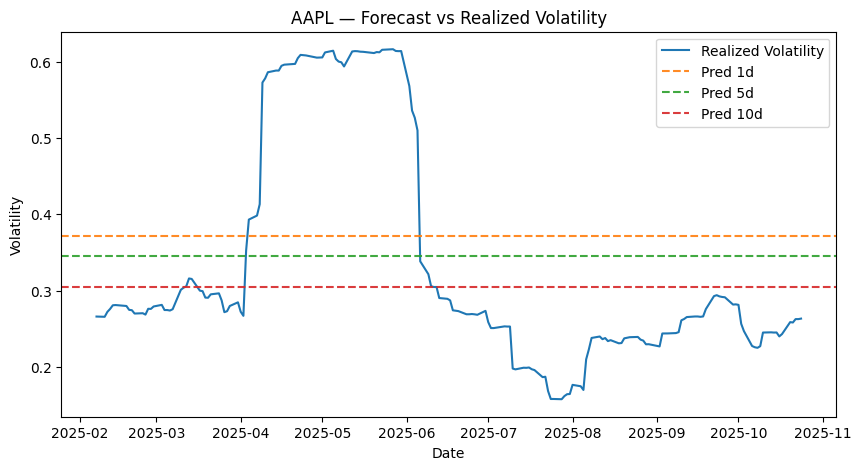

In [1]:
from volsense_inference.forecast_engine import Forecast

# Initialize once
fcast = Forecast(model_version="v6a", checkpoints_dir="models")

# Run forecasts
preds = fcast.run(["AAPL", "MSFT", "NVDA", "TSLA", "META", "JPM"])
print(preds)


fcast.plot("MSFT")
fcast.plot("AAPL")

🚀 Initializing VolSense.Forecast (model=v6a)
✔ Window=40, Horizons=[1, 5, 10]

🌍 Running forecasts for 5 tickers...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Forecasting: 100%|██████████| 5/5 [00:00<00:00, 59.28it/s]


✅ Forecast complete.
  ticker  realized_vol  forecast_vol  f/r_ratio    zscore vol_regime
0   TSLA      0.494639      0.586836   1.186391  1.958034   High Vol
1   PYPL      0.366697      0.410583   1.119680  0.847345     Normal
2   AAPL      0.263261      0.345478   1.312302  0.437073     Normal
3   MSFT      0.147084      0.261836   1.780186 -0.090008     Normal
4    SPY      0.108917      0.159657   1.465858 -0.733911    Low Vol
AAPL: 5-day vol ↑ rising (+0.44σ vs peers), regime: Normal.
MSFT: 5-day vol ↑ rising (-0.09σ vs peers), regime: Normal.
TSLA: 5-day vol ↑ rising (+1.96σ vs peers), regime: High Vol.


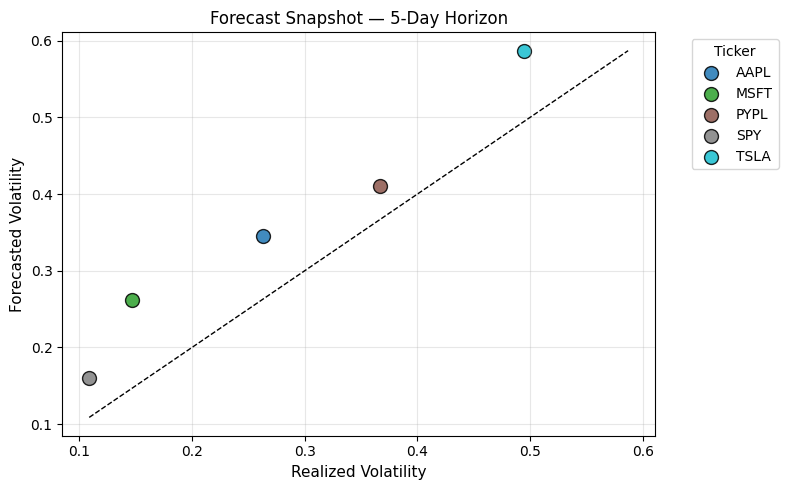

In [4]:
from volsense_inference.forecast_engine import Forecast
from volsense_inference.analytics import Analytics

# Generate forecasts
fcast = Forecast(model_version="v6a", checkpoints_dir="models")
preds = fcast.run(["AAPL", "MSFT", "TSLA", "SPY", "PYPL"])

# Create analytics snapshot
analytics = Analytics(preds)
analytics.compute()

# Trader summary table
print(analytics.summary())

# Human-readable signals
print(analytics.describe("AAPL"))
print(analytics.describe("MSFT"))
print(analytics.describe("TSLA"))

# Quick scatter plot
analytics.plot("pred_vol_5")

In [2]:
preds

,ticker,realized_vol,pred_vol_1,pred_vol_5,pred_vol_10,vol_diff,vol_direction
0,AAPL,0.263261,0.371559,0.345468,0.304790,0.108298,1.0
1,MSFT,0.147084,0.280689,0.261830,0.229535,0.133605,1.0
2,NVDA,0.329314,0.561839,0.510363,0.447948,0.232525,1.0
3,TSLA,0.494639,0.637806,0.586821,0.520773,0.143166,1.0
4,META,0.213953,0.479174,0.439553,0.391581,0.265221,1.0
5,JPM,0.191760,0.361235,0.329886,0.282598,0.169475,1.0


In [2]:
from volsense_inference.signal_engine import SignalEngine

# Initialize signal engine
signal_engine = SignalEngine(preds)
signal_engine.compute_signals()

C:\Users\rahul\OneDrive\Documents\GitHub\VolSense\volsense_inference\signal_engine.py:169: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(["date", "horizon"], group_keys=False).apply(_xsec_z)


,date,ticker,horizon,forecast_vol,realized_vol,vol_zscore,vol_momentum,vol_spread,regime_flag,xsec_rank,signal_strength
0,2025-10-26,AAPL,1,0.371559,0.263261,-0.625428,0.0,0.411372,normal,0.500000,0.000000
1,2025-10-26,AAPL,5,0.345468,0.263261,-0.599078,0.0,0.312265,normal,0.500000,0.000000
2,2025-10-26,AAPL,10,0.304790,0.263261,-0.577966,0.0,0.157750,normal,0.500000,0.000000
3,2025-10-26,JPM,1,0.361235,0.191760,-0.709112,0.0,0.883784,normal,0.333333,-0.333333
4,2025-10-26,JPM,5,0.329886,0.191760,-0.738710,0.0,0.720306,normal,0.333333,-0.333333
5,2025-10-26,JPM,10,0.282598,0.191760,-0.798805,0.0,0.473705,normal,0.333333,-0.333333
6,2025-10-26,META,1,0.479174,0.213953,0.246882,0.0,1.239625,normal,0.666667,0.333333
7,2025-10-26,META,5,0.439553,0.213953,0.244036,0.0,1.054436,normal,0.666667,0.333333
8,2025-10-26,META,10,0.391581,0.213953,0.285694,0.0,0.830218,normal,0.666667,0.333333
9,2025-10-26,MSFT,1,0.280689,0.147084,-1.362001,0.0,0.908361,calm,0.166667,-0.666667


In [3]:
signal_engine.top_signals(horizon=5, direction="long")

,date,ticker,horizon,forecast_vol,vol_zscore,vol_momentum,vol_spread,signal_strength,regime_flag
16,2025-10-26,TSLA,5,0.586821,1.563742,0.0,0.186361,1.000000,spike
13,2025-10-26,NVDA,5,0.510363,0.878587,0.0,0.549778,0.666667,normal
7,2025-10-26,META,5,0.439553,0.244036,0.0,1.054436,0.333333,normal
1,2025-10-26,AAPL,5,0.345468,-0.599078,0.0,0.312265,0.000000,normal
4,2025-10-26,JPM,5,0.329886,-0.738710,0.0,0.720306,-0.333333,normal
10,2025-10-26,MSFT,5,0.261830,-1.348576,0.0,0.780144,-0.666667,calm


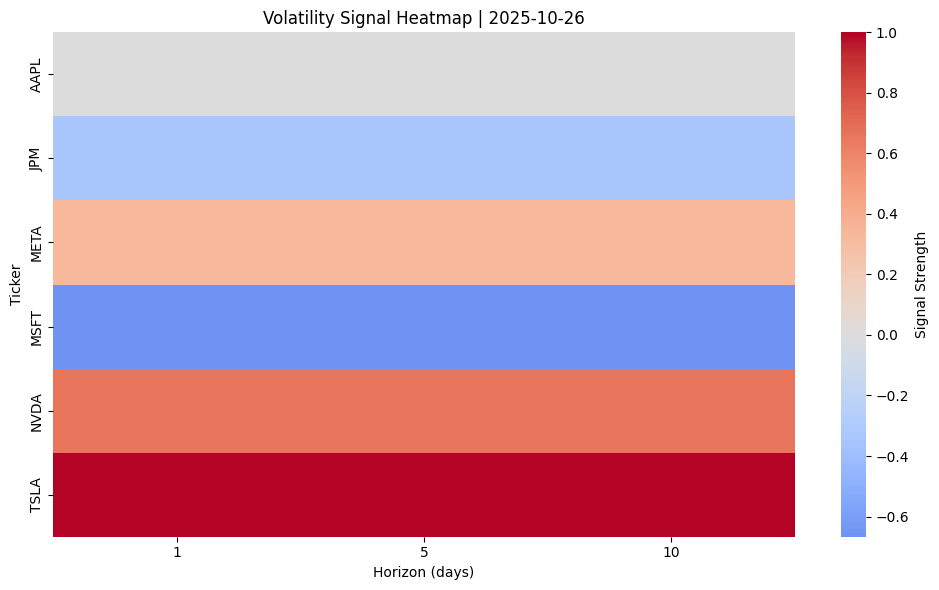

In [5]:
signal_engine.plot_heatmap()